# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1, 0],
              [1, 1]])
b = np.array([1, 0])
# beta = np.linalg.inv(A).dot(b)
beta = np.linalg.solve(A, b)
beta

array([ 1., -1.])

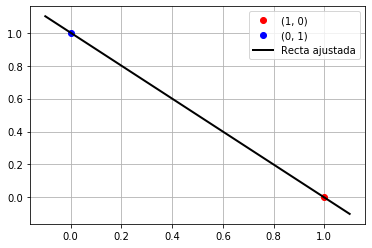

In [3]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6, 4))
plt.plot(1, 0, 'ro', label="(1, 0)")
plt.plot(0, 1, 'bo', label="(0, 1)")
x = np.linspace(-0.1, 1.1)
y = beta[0] + beta[1] * x
plt.plot(x, 
         y,
         'k',
         lw=2,  # lw: Grosor de la línea: Line width
         label="Recta ajustada")
plt.legend()
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [4]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1, -1, 1],
              [1,  0, 0],
              [1,  1, 1]])
b = np.array([1, 0, 1])
beta = np.dot(np.linalg.inv(A), b)
beta

array([0., 0., 1.])

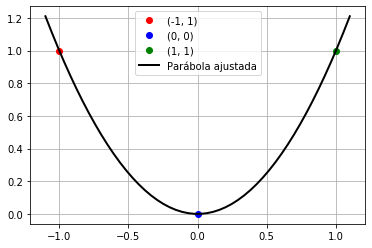

In [5]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6, 4))
plt.plot(-1, 1, 'ro', label="(-1, 1)")
plt.plot(0, 0, 'bo', label="(0, 0)")
plt.plot(1, 1, 'go', label="(1, 1)")
x = np.linspace(-1.1, 1.1)
y = beta[0] + beta[1] * x + beta[2] * x**2
plt.plot(x, 
         y,
         'k',
         lw=2,  # lw: Grosor de la línea: Line width
         label="Parábola ajustada")
plt.legend()
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [6]:
np.random.normal(0, 0.3, (100,))

array([-3.28937395e-01,  4.51002792e-01, -6.40272276e-01,  5.04767111e-01,
        1.18736418e-01,  1.34018608e-01, -6.85413311e-01,  5.27769296e-01,
       -8.72851960e-02, -2.42899138e-01,  5.11140603e-01, -1.58480906e-01,
        2.64472664e-01,  5.57484965e-01,  1.40029930e-01,  2.37028488e-01,
        1.97603171e-01,  3.82984360e-01, -4.44276939e-01,  3.21809037e-01,
       -3.24746003e-01, -6.48948169e-02,  4.29402515e-01,  1.74163971e-01,
        1.94302648e-03, -8.88057313e-02,  4.29179921e-01, -4.96657673e-01,
        1.06316536e-02, -1.42835108e-01,  7.44334739e-03, -4.91619130e-01,
        7.58778642e-02, -1.86962359e-01,  5.78841250e-01,  3.27535374e-01,
        1.56975445e-01, -1.13611799e-01,  3.67910985e-01,  1.65169236e-01,
       -1.35971678e-01,  4.81936663e-01,  1.63368218e-01, -1.11803799e-01,
       -3.67933399e-01,  2.34129724e-01,  6.20890658e-02,  3.77395206e-01,
        1.97987540e-05, -3.47418500e-02, -9.09106097e-02,  5.11577395e-01,
       -3.21996991e-01, -

In [7]:
np.random.normal(0, 0.3, (5, 5))

array([[-0.64035169,  0.04277719, -0.19690305, -0.44724308, -0.14522028],
       [ 0.27508622, -0.55593283, -0.31848256,  0.44159517, -0.24142403],
       [ 0.01652923,  0.39046627,  0.12435353, -0.03441222,  0.37386899],
       [ 0.04511652,  0.08969124,  0.41028415,  0.09197033,  0.49351269],
       [ 0.00576406,  0.2721566 ,  0.08958626,  0.15550836, -0.19507825]])

In [8]:
# Crear un conjunto de puntos ruidosos a partir de una recta
x = np.linspace(0, 10, 100)
y = 10 + 2 * x + np.random.normal(0, 1.5, (100,))

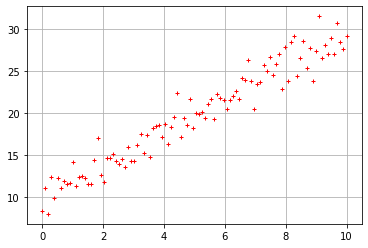

In [9]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4) # ms: Tamaño de puntos: Marker size
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [10]:
# Importar el módulo optimize de la librería scipy
from scipy.optimize import minimize

In [11]:
# Función minimize
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where x is an 1-D array with shape (n,) and `args`
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see here) <op

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

$$
\min_{\beta} \frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2
$$

$\hat{f}(x) = \beta_0+\beta_1 x$

In [12]:
# Definir funcion objetivo y punto inicial
def error_sq(beta, x, y):
    n = len(x)
    f = beta[0] + beta[1] * x
    return ((y - f)**2).sum() / (2 * n)

In [13]:
beta_ini = [0, 0]

In [14]:
solucion1 = minimize(fun=error_sq,
                     x0=beta_ini,
                     args=(x, y))
solucion1

      fun: 1.1010009337155642
 hess_inv: array([[ 3.92106171, -0.58514547],
       [-0.58514547,  0.11717114]])
      jac: array([ 5.51342964e-07, -2.23517418e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([9.88512001, 1.97606271])

In [15]:
# Mostrar
beta = solucion1.x
beta

array([9.88512001, 1.97606271])

¿Qué tan bien luce el ajuste?

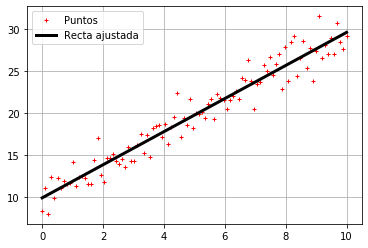

In [16]:
# Grafica de los puntos y la recta ajustada
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
y_fit = beta[0] + beta[1] * x
plt.plot(x, y_fit, 'k', lw=3, label="Recta ajustada")
plt.legend()
plt.grid()

In [17]:
R_sq = 1 - np.var(y - y_fit) / np.var(y)
R_sq

0.9377958380881459

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [76]:
# Generamos 100 puntos ruidosos a partir de una senoidal
n = 100
x = np.linspace(0, 1, n)
y = np.sin(2 * np.pi * x) + np.random.normal(0, 0.25, (n,))

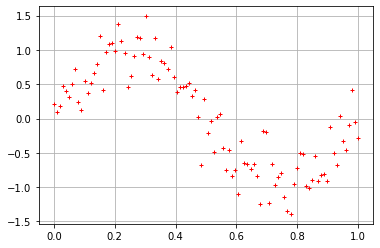

In [77]:
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4) # ms: Tamaño de puntos: Marker size
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [78]:
# Definir funcion objetivo y semilla
def error_sq1(beta, x, y):
    n = len(x)
    f = beta[0] + beta[1] * x
    return ((y - f)**2).sum() / (2 * n)
beta_ini1 = [0, 0]

In [79]:
# Resolver
solucion1 = minimize(fun=error_sq1,
                     x0=beta_ini1,
                     args=(x, y))
solucion1

      fun: 0.13223874965270987
 hess_inv: array([[ 3.79698102, -5.63082796],
       [-5.63082796, 11.32592545]])
      jac: array([ 1.74343586e-06, -1.13621354e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 0.93653844, -1.83854247])

**Veamos $\beta$ para el ajuste con recta**

In [150]:
# Mostrar coeficientes
beta1 = solucion1.x
beta1

array([ 0.93653844, -1.83854247])

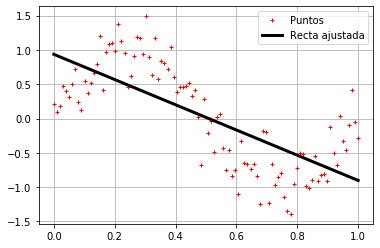

In [151]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
y_fit = beta1[0] + beta1[1] * x
plt.plot(x, y_fit, 'k', lw=3, label="Recta ajustada")
plt.legend()
plt.grid()

In [152]:
Rsq_poly1 = 1 - np.var(y_fit - y) / np.var(y)
Rsq_poly1

0.5207415128664296

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [82]:
# Definir funcion objetivo y semilla
def error_sq2(beta, x, y):
    n = len(x)
    f = beta[0] + beta[1] * x + beta[2] * x**2
    return ((y - f)**2).sum() / (2 * n)

beta_ini2 = [0, 0, 0]

In [84]:
# Resolver
solucion2 = minimize(fun=error_sq2,
                     x0=beta_ini2,
                     args=(x, y))
solucion2

      fun: 0.13217043467271158
 hess_inv: array([[   8.49036265,  -34.28213342,   28.67259118],
       [ -34.28213342,  184.45187511, -173.08985333],
       [  28.67259118, -173.08985333,  172.8751348 ]])
      jac: array([-1.18650496e-06, -8.12113285e-07, -6.12810254e-07])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([ 0.96188963, -1.99226222,  0.15374079])

**Veamos $\beta$ para el ajuste con parábola**

In [85]:
# Mostrar coeficientes
beta2 = solucion2.x
beta2

array([ 0.96188963, -1.99226222,  0.15374079])

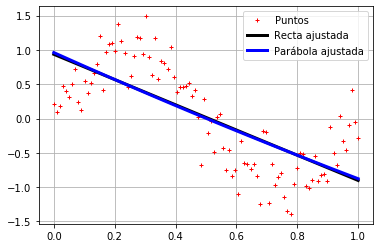

In [86]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
y_fit1 = beta1[0] + beta1[1] * x
plt.plot(x, y_fit1, 'k', lw=3, label="Recta ajustada")
y_fit2 = beta2[0] + beta2[1] * x + beta2[2] * x**2
plt.plot(x, y_fit2, 'b', lw=3, label="Parábola ajustada")
plt.legend()
plt.grid()

In [87]:
beta1, beta2

(array([ 0.93653844, -1.83854247]),
 array([ 0.96188963, -1.99226222,  0.15374079]))

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [91]:
beta = [0, 1, 2, 3]
np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(3 + 1)], axis=1).sum(axis=1)

array([0.        , 0.01030816, 0.021043  , 0.03222306, 0.04386689,
       0.05599305, 0.06862009, 0.08176655, 0.09545099, 0.10969196,
       0.12450801, 0.1399177 , 0.15593956, 0.17259216, 0.18989404,
       0.20786376, 0.22651987, 0.24588091, 0.26596544, 0.28679201,
       0.30837917, 0.33074547, 0.35390947, 0.3778897 , 0.40270473,
       0.42837311, 0.45491338, 0.4823441 , 0.51068382, 0.53995109,
       0.57016445, 0.60134247, 0.63350369, 0.66666667, 0.70084994,
       0.73607208, 0.77235162, 0.80970711, 0.84815711, 0.88772018,
       0.92841485, 0.97025968, 1.01327323, 1.05747404, 1.10288066,
       1.14951165, 1.19738555, 1.24652092, 1.29693631, 1.34865026,
       1.40168134, 1.45604808, 1.51176905, 1.56886279, 1.62734786,
       1.6872428 , 1.74856616, 1.81133651, 1.87557238, 1.94129232,
       2.0085149 , 2.07725866, 2.14754215, 2.21938392, 2.29280253,
       2.36781652, 2.44444444, 2.52270486, 2.60261631, 2.68419735,
       2.76746652, 2.85244239, 2.9391435 , 3.0275884 , 3.11779

In [92]:
# Definir funcion objetivo y semilla
def error_sq(beta, x, y, N):
    n = len(x)
    f = np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(N + 1)], axis=1).sum(axis=1)
    return ((y - f)**2).sum() / (2 * n)

beta_ini3 = np.zeros((4,))

In [93]:
# Resolver
solucion3 = minimize(fun=error_sq,
                     x0=beta_ini3,
                     args=(x, y, 3))
solucion3

      fun: 0.04028207873521436
 hess_inv: array([[   14.43294878,  -109.42950488,   219.88670217,  -128.47796199],
       [ -109.42950488,  1119.06233957, -2533.98784162,  1579.15522304],
       [  219.88670217, -2533.98784162,  6110.49694722, -3960.83209175],
       [ -128.47796199,  1579.15522304, -3960.83209175,  2637.70538006]])
      jac: array([3.53623182e-06, 1.38906762e-06, 1.48406252e-06, 1.58650801e-06])
  message: 'Optimization terminated successfully.'
     nfev: 198
      nit: 32
     njev: 33
   status: 0
  success: True
        x: array([ -0.10623526,  11.15689657, -32.8850762 ,  22.02595606])

**Veamos $\beta$ para el ajuste con cúbica**

In [94]:
beta2

array([ 0.96188963, -1.99226222,  0.15374079])

In [95]:
# Mostrar coeficientes
beta3 = solucion3.x
beta3

array([ -0.10623526,  11.15689657, -32.8850762 ,  22.02595606])

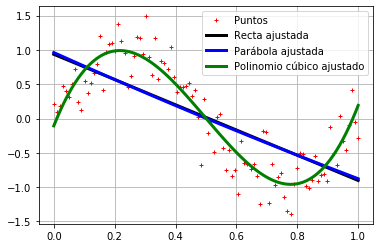

In [96]:
# Graficar recta, parabola y cubica
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
y_fit1 = beta1[0] + beta1[1] * x
plt.plot(x, y_fit1, 'k', lw=3, label="Recta ajustada")
y_fit2 = beta2[0] + beta2[1] * x + beta2[2] * x**2
plt.plot(x, y_fit2, 'b', lw=3, label="Parábola ajustada")
y_fit3 = np.concatenate([beta3[i] * x.reshape((len(x), 1))**i for i in range(3 + 1)], axis=1).sum(axis=1)
plt.plot(x, y_fit3, 'g', lw=3, label="Polinomio cúbico ajustado")
plt.legend()
plt.grid()

In [98]:
Rsq_poly3 = 1 - np.var(y - y_fit3) / np.var(y)
Rsq_poly3

0.8540100525665043

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.5. Ajustemos un polinomio de grado 7...

In [99]:
# Definimos funcion objetivo y semilla
solucion7 = minimize(fun=error_sq,
                     x0=np.zeros((8,)),
                     args=(x, y, 7)
                    )
solucion7

      fun: 0.03773323703168051
 hess_inv: array([[ 2.31419552e+01, -3.05783075e+02,  1.14236112e+03,
        -1.38913193e+03, -1.00819262e+02,  7.48073957e+02,
         4.26335321e+02, -5.46800973e+02],
       [-3.05783075e+02,  5.70606380e+03, -2.49217817e+04,
         3.37133522e+04,  1.16835997e+03, -1.92844191e+04,
        -1.05077040e+04,  1.45157636e+04],
       [ 1.14236112e+03, -2.49217817e+04,  1.19197998e+05,
        -1.72744828e+05, -1.25901396e+03,  1.03098165e+05,
         5.43451513e+04, -7.94093286e+04],
       [-1.38913193e+03,  3.37133522e+04, -1.72744828e+05,
         2.64654356e+05, -4.43155178e+03, -1.63791261e+05,
        -8.38099746e+04,  1.28880108e+05],
       [-1.00819262e+02,  1.16835997e+03, -1.25901396e+03,
        -4.43155178e+03,  3.07466720e+03,  5.51377775e+03,
         1.60435720e+03, -5.73954343e+03],
       [ 7.48073957e+02, -1.92844191e+04,  1.03098165e+05,
        -1.63791261e+05,  5.51377775e+03,  1.03931201e+05,
         5.20533213e+04, -8.3077501

**De nuevo, veamos $\beta$**

In [102]:
# Resolvemos
beta7 = solucion7.x

In [103]:
beta7

array([  0.04524435,   6.89840606,  -8.27028252, -21.82092033,
        10.09092494,  22.33469114,   9.02166123, -18.35496303])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

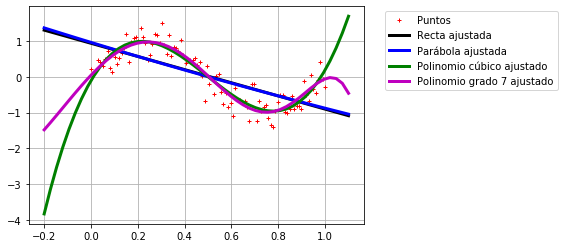

In [116]:
# Grafica de ajustes
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
x_fit = np.linspace(-0.2, 1.1)
y_fit1 = beta1[0] + beta1[1] * x_fit
plt.plot(x_fit, y_fit1, 'k', lw=3, label="Recta ajustada")
y_fit2 = beta2[0] + beta2[1] * x_fit + beta2[2] * x_fit**2
plt.plot(x_fit, y_fit2, 'b', lw=3, label="Parábola ajustada")
y_fit3 = np.concatenate([beta3[i] * x_fit.reshape((len(x_fit), 1))**i for i in range(3 + 1)], axis=1).sum(axis=1)
plt.plot(x_fit, y_fit3, 'g', lw=3, label="Polinomio cúbico ajustado")
y_fit7 = np.concatenate([beta7[i] * x_fit.reshape((len(x_fit), 1))**i for i in range(7 + 1)], axis=1).sum(axis=1)
plt.plot(x_fit, y_fit7, 'm', lw=3, label="Polinomio grado 7 ajustado")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()

In [106]:
Rsq_poly7 = 1 - np.var(y - y_fit7) / np.var(y)
Rsq_poly7

0.863247541724572

In [107]:
Rsq_poly3

0.8540100525665043

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [122]:
error_cuadratico_medio = []
for N in range(1, 11):
    solucion = minimize(fun=error_sq,
                        x0=np.zeros((N + 1,)),
                        args=(x, y, N))
    beta = solucion.x
    y_fit = np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(N + 1)], axis=1).sum(axis=1)
    error_cuadratico_medio.append(((y - y_fit)**2).mean())

Text(0, 0.5, 'Error cuadrático medio')

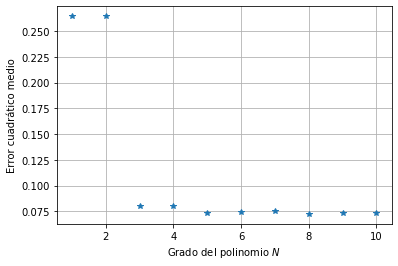

In [125]:
# Error cuadratico
plt.plot(range(1, 11), error_cuadratico_medio, '*')
plt.grid()
plt.xlabel("Grado del polinomio $N$")
plt.ylabel("Error cuadrático medio")

En efecto, parece que con $3$ es suficiente.

In [113]:
beta3

array([ -0.10623526,  11.15689657, -32.8850762 ,  22.02595606])

In [114]:
beta7

array([  0.04524435,   6.89840606,  -8.27028252, -21.82092033,
        10.09092494,  22.33469114,   9.02166123, -18.35496303])

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [126]:
def error_sq_ridge(beta, x, y, N, l):
    n = len(x)
    f = np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(N + 1)], axis=1).sum(axis=1)
    return ((y - f)**2).sum() / (2 * n) + l * np.linalg.norm(beta[1:])**2

In [145]:
solucion7_ridge = minimize(fun=error_sq_ridge,
                           x0=np.zeros((8,)),
                           args=(x, y, 7, 0.0001))

In [146]:
beta7_ridge = solucion7_ridge.x
beta7_ridge

array([ 0.43732648,  3.21027655, -7.00264378, -3.11507795,  1.0126849 ,
        2.70607313,  2.35466435,  0.75133236])

In [147]:
beta7

array([  0.04524435,   6.89840606,  -8.27028252, -21.82092033,
        10.09092494,  22.33469114,   9.02166123, -18.35496303])

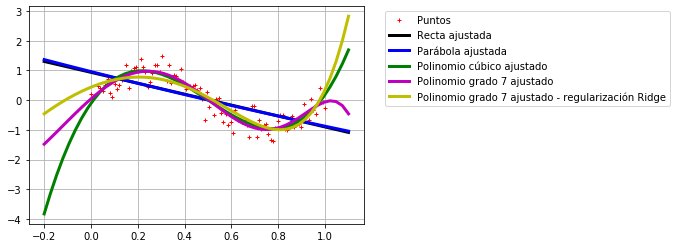

In [148]:
# Grafica de ajustes
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         '+r',
         ms=4,  # ms: Tamaño de puntos: Marker size
         label='Puntos')
x_fit = np.linspace(-0.2, 1.1)
y_fit1 = beta1[0] + beta1[1] * x_fit
plt.plot(x_fit, y_fit1, 'k', lw=3, label="Recta ajustada")
y_fit2 = beta2[0] + beta2[1] * x_fit + beta2[2] * x_fit**2
plt.plot(x_fit, y_fit2, 'b', lw=3, label="Parábola ajustada")
y_fit3 = np.concatenate([beta3[i] * x_fit.reshape((len(x_fit), 1))**i for i in range(3 + 1)], axis=1).sum(axis=1)
plt.plot(x_fit, y_fit3, 'g', lw=3, label="Polinomio cúbico ajustado")
y_fit7 = np.concatenate([beta7[i] * x_fit.reshape((len(x_fit), 1))**i for i in range(7 + 1)], axis=1).sum(axis=1)
plt.plot(x_fit, y_fit7, 'm', lw=3, label="Polinomio grado 7 ajustado")
y_fit7_ridge = np.concatenate([beta7_ridge[i] * x_fit.reshape((len(x_fit), 1))**i for i in range(7 + 1)], axis=1).sum(axis=1)
plt.plot(x_fit, y_fit7_ridge, 'y', lw=3, label="Polinomio grado 7 ajustado - regularización Ridge")
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [149]:
help(np.linalg.norm)

Help on function norm in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.
    
    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.
    
    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {non-zero int, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes``). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it specifies the
        axes that hold 2-D matrices, and the matrix norms of these

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

In [175]:
# Crear un conjunto de puntos ruidosos a partir de una recta
x = np.linspace(0, 10, 100)
y = 10 + 2 * x + np.random.normal(0, 1.5, (100,))
y[0] = 50
y[50] = 100
y[-1] = 0

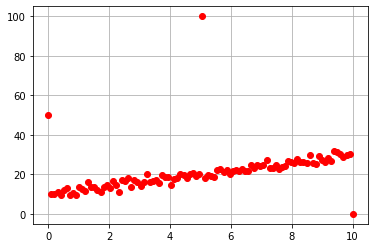

In [176]:
# Graficar
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         'or',
         ms=6) # ms: Tamaño de puntos: Marker size
plt.grid()

Solucionamos el problema normalmente...

In [177]:
def error_sq(beta, x, y, N):
    n = len(x)
    f = np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(N + 1)], axis=1).sum(axis=1)
    return ((y - f)**2).sum() / (2 * n)

In [178]:
solucion_atipicos = minimize(fun=error_sq,
                             x0=np.zeros((2,)),
                             args=(x, y, 1))
solucion_atipicos

      fun: 44.384706674467026
 hess_inv: array([[ 3.94462577, -0.58723786],
       [-0.58723786,  0.11670335]])
      jac: array([-1.43051147e-06, -2.38418579e-06])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([13.0104579,  1.575093 ])

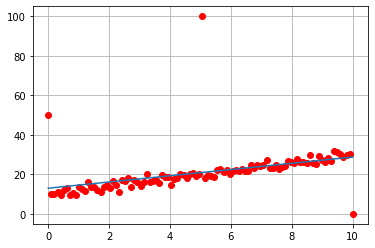

In [181]:
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         'or',
         ms=6) # ms: Tamaño de puntos: Marker size
beta_atipicos = solucion_atipicos.x
y_fit = beta_atipicos[0] + beta_atipicos[1] * x
plt.plot(x, y_fit)
plt.grid()
#plt.axis([0, 10, 10, 30])

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

In [182]:
def huber(a, d):
    if np.abs(a) <= d:
        return a**2
    else:
        return d * (2 * np.abs(a) - d)

In [183]:
def error_sq_huber(beta, x, y, N):
    n = len(x)
    f = np.concatenate([beta[i] * x.reshape((len(x), 1))**i for i in range(N + 1)], axis=1).sum(axis=1)
    return (np.vectorize(huber)(y - f, 1)).sum() / (2 * n)

In [184]:
solucion_robusto = minimize(fun=error_sq_huber,
                             x0=np.zeros((2,)),
                             args=(x, y, 1))
solucion_robusto

      fun: 2.2582985965847007
 hess_inv: array([[ 8.77111707, -1.33177172],
       [-1.33177172,  0.27102579]])
      jac: array([ 1.78813934e-07, -1.49011612e-06])
  message: 'Optimization terminated successfully.'
     nfev: 76
      nit: 11
     njev: 19
   status: 0
  success: True
        x: array([10.27488621,  1.93118737])

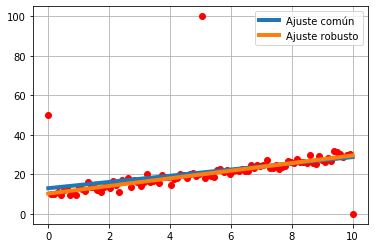

In [185]:
plt.figure(figsize=(6, 4))
plt.plot(x, 
         y,
         'or',
         ms=6) # ms: Tamaño de puntos: Marker size
beta_atipicos = solucion_atipicos.x
y_fit = beta_atipicos[0] + beta_atipicos[1] * x
plt.plot(x, y_fit, lw=4, label='Ajuste común')
beta_robusto = solucion_robusto.x
y_fit_robusto = beta_robusto[0] + beta_robusto[1] * x
plt.plot(x, y_fit_robusto, lw=4, label='Ajuste robusto')
plt.legend()
plt.grid()

Mejor...

## 5. Tarea

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático medio contra el grado del polinomio, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?

Abrir un nuevo notebook, llamado `Tarea3_ApellidoNombre` y subirlo a canvas en el espacio habilitado.

In [1]:
import pandas as pd
data = pd.read_csv("housing_prices.csv")
x = data['size'].values
y = data['price'].values

In [3]:
x

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203])

In [4]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500])

# Avisos:

## Tarea para: Lunes 14 de Junio.

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Enviar un correo con los integrantes de su equipo ya.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Para este jueves 10 de junio, a más tardar, deben acercarse a mi con su tema de proyecto. Juntos, definiremos el alncance.
### 4. Fecha de entrega y presentación: Lunes 21 de Junio.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>